## Classification Prediction With Different Models
In this project, we used different models, including XGBoost, Logistic, SVM, Random Forest, DNN and ANN, to predict whether the income will be >50k or <=50k for each adult in the test dataset.

By comparison, We found that models of XGBoost and Random Forest perform better than Logistic and SVM, especially XGBoost seems to be the most promising algorithm among all of them.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow 
for gpu in tensorflow.config.experimental.list_physical_devices("GPU"):
    tensorflow.config.experimental.set_memory_growth(gpu, True)

## Load training data dataset.

In [2]:
train_data = pd.read_csv('adult_trdata.csv', names=['age','workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
                                                     'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
# replace '?' with null                                                     'hours-per-week', 'native-country', 'income'],sep=',\s', na_values=["?"],engine='python')
print(train_data.shape)
display(train_data.head())

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
## Check the null
train_data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [4]:
new_train = train_data.dropna()
new_train.shape

(30162, 15)

In [5]:
new_train['workclass'].value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

In [6]:
new_train['education'].value_counts()

HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: education, dtype: int64

In [7]:
new_train['income'].value_counts()

<=50K    22654
>50K      7508
Name: income, dtype: int64

In [8]:
new_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

<AxesSubplot:>

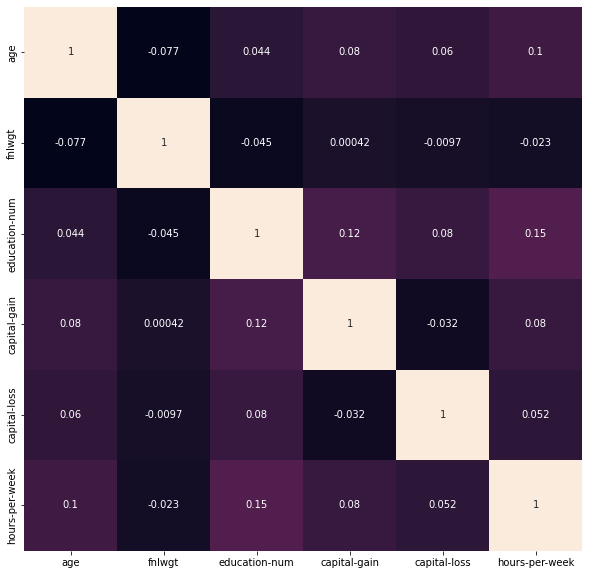

In [9]:
## Features correlation analysis.
plt.figure(figsize = (10, 10))
corr_matrix = new_train[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']].corr()
sns.heatmap(corr_matrix, annot = True, cbar = False)

In [10]:
new_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [11]:
# Dummy for categorical variables (training dataset)
def dummies(x):
    dummy = pd.get_dummies(new_train[x])
    new_train.drop(columns = x, inplace = True)
    return pd.concat([new_train, dummy], axis=1)

new_train = dummies('workclass')
new_train = dummies('education')
new_train = dummies('marital-status')
new_train = dummies('occupation')
new_train = dummies('relationship')
new_train = dummies('race')
new_train = dummies('sex')
new_train = dummies('native-country')
new_train.shape

C:\Users\Sealion\anaconda3\envs\python38\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(30162, 105)

In [12]:
new_train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,Federal-gov,Local-gov,Private,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,39,77516,13,2174,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [13]:
## Transfer column of income to binary feature.
new_train['income'] = new_train['income'].apply(lambda x:1 if x =='>=50K' or x =='>50K' else 0)
new_train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,Federal-gov,Local-gov,Private,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education-num'}>,
        <AxesSubplot:title={'center':'capital-gain'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>]], dtype=object)

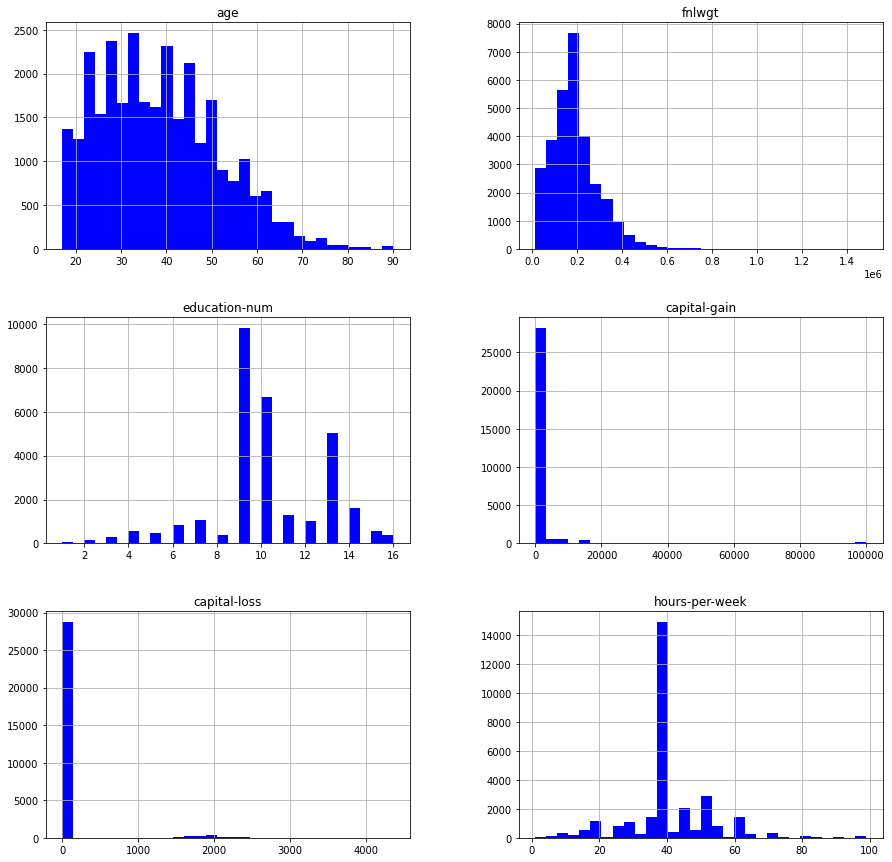

In [14]:
## Visualiza the distribution.
new_train.iloc[:, :6].hist(bins = 30, figsize = (15,15), color = 'b')

## Load test dataset.

In [15]:
test_dataRaw = pd.read_csv('adult_test.csv', names=['age','workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
                                                     'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
                                                     'hours-per-week', 'native-country', 'income'], sep=',\s', na_values=["?"],engine='python')
print(test_dataRaw.shape)
test_data = test_dataRaw.drop([0])
print(test_data.shape)
test_data = test_data.reset_index(drop=True)
display(test_data.head())

(16282, 15)
(16281, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
4,18,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [16]:
## Check the null value.
test_data.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [17]:
new_test = test_data.dropna()
new_test.shape

(15060, 15)

In [18]:
new_test['workclass'].value_counts()

Private             11021
Self-emp-not-inc     1297
Local-gov            1033
State-gov             667
Self-emp-inc          572
Federal-gov           463
Without-pay             7
Name: workclass, dtype: int64

In [19]:
new_test['education'].value_counts()

HS-grad         4943
Some-college    3221
Bachelors       2526
Masters          887
Assoc-voc        652
11th             571
Assoc-acdm       499
10th             403
7th-8th          266
Prof-school      243
9th              221
12th             200
Doctorate        169
5th-6th          161
1st-4th           71
Preschool         27
Name: education, dtype: int64

In [20]:
new_test['income'].value_counts()

<=50K.    11360
>50K.      3700
Name: income, dtype: int64

In [21]:
# Dummy for categorical variables (testing)
def dummies_test(x):
    dummy_test = pd.get_dummies(new_test[x])
    new_test.drop(columns = x, inplace = True)
    return pd.concat([new_test, dummy_test], axis=1)

new_test = dummies_test('workclass')
new_test = dummies_test('education')
new_test = dummies_test('marital-status')
new_test = dummies_test('occupation')
new_test = dummies_test('relationship')
new_test = dummies_test('race')
new_test = dummies_test('sex')
new_test = dummies_test('native-country')
new_test.shape

C:\Users\Sealion\anaconda3\envs\python38\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(15060, 104)

In [22]:
new_test.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income', 'Federal-gov', 'Local-gov', 'Private',
       ...
       'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan', 'Thailand',
       'Trinadad&Tobago', 'United-States', 'Vietnam', 'Yugoslavia'],
      dtype='object', length=104)

In [23]:
## Transfer column income to binary variable.
new_test['income'] = new_test['income'].apply(lambda x:1 if x =='>=50K.' or x =='>50K.' else 0)
new_test.shape

(15060, 104)

In [24]:
## Check the column difference between train and test data
extra_column = [x for x in list(new_train.columns) if x not in list(new_test.columns)]
extra_column

['Holand-Netherlands']

In [25]:
new_test['Holand-Netherlands'] = 0
new_test.shape

(15060, 105)

## (1). XGBOOST Classifier (Model)

In [27]:
X_train, Y_train = np.asarray(new_train.loc[:, new_train.columns !='income']).astype(np.float32), np.asarray(new_train['income']).astype(np.float32)
X_test, Y_test = np.asarray(new_test.loc[:, new_test.columns !='income']).astype(np.float32), np.asarray(new_test['income']).astype(np.float32)

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((30162, 104), (30162,), (15060, 104), (15060,))

In [28]:
import xgboost as xgb
model1 = xgb.XGBClassifier(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 5, n_estimators = 100)
model1.fit(X_train, Y_train)

C:\Users\Sealion\anaconda3\envs\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=32, num_parallel_tree=1,
              objective='reg:squarederror', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
model1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=32, num_parallel_tree=1,
              objective='reg:squarederror', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [30]:
Y_pred = model1.predict(X_test)
print("Accuracy {} %".format( 100 * accuracy_score(Y_pred, Y_test)))

Accuracy 86.71314741035857 %


## (2). Logistic Regression (Model)

In [32]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(random_state = 0, penalty = 'l2')
model2.fit(X_train, Y_train)
Y_pred2 = model2.predict(X_test)
print("Accuracy {} %".format( 100 * accuracy_score(Y_pred2, Y_test)))

Accuracy 79.2828685258964 %


## (3).SVM (Model)

In [33]:
## SVM (rbf)
from sklearn.svm import SVC
model3 = SVC(random_state = 0, kernel = 'rbf')
model3.fit(X_train, Y_train)

# Predicting Test Set
y_pred3 = model3.predict(X_test)
print("Accuracy {} %".format( 100 * accuracy_score(y_pred3, Y_test)))

Accuracy 79.03054448871181 %


## (4). Random Forest (Model)

In [34]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(n_estimators=100)
model4.fit(X_train, Y_train)

y_pred4 = model4.predict(X_test)
model4.score(X_test, Y_test)
# print("Accuracy {} %".format( 100 * accuracy_score(y_pred4, Y_test)))

0.8544488711819389

## (5) Deep Nueral Network

In [35]:
## Deep Nueral Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
model_5 = Sequential([
    Dense(units=16, input_dim = 104,activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(20,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),
])
model_5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                1680      
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 3,117
Trainable params: 3,117
Non-trainable params: 0
______________________________________________________

In [36]:
# Train model
model_5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_5.fit(X_train, Y_train, batch_size=20, epochs=25)
score_5 = model_5.evaluate(X_test, Y_test)
print(score_5)

Epoch 1/25
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1509/1509 [==============================] - 4s 2ms/step - loss: 29.9857 - accuracy: 0.6540
Epoch 2/25
1509/1509 [==============================] - 3s 2ms/step - loss: 0.9669 - accuracy: 0.7205
Epoch 3/25
1509/1509 [==============================] - 3s 2ms/step - loss: 0.5797 - accuracy: 0.7611
Epoch 4/25
1509/1509 [==============================] - 3s 

## (6). Artificial Neural Network Model (ANN)

In [37]:
## ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [38]:
# import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [39]:
# optimizer = Adam()
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 104))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                5250      
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 150)               7650      
_________________________________________________________________
activation_1 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 150)               22650     
_________________________________________________________________
activation_2 (Activation)    (None, 150)              

In [40]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')
epochs_hist = ANN_model.fit(X_train, Y_train, epochs = 50, batch_size = 20, validation_split = 0.2)

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1190/1207 [============================>.] - ETA: 0s - loss: 1833069.5000WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000026A085A7C10> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10

In [41]:
result = ANN_model.evaluate(X_test, Y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

471/471 [==============================] - 1s 1ms/step - loss: 0.1858
Accuracy : 0.8141995221376419
